# 회귀 - 캘리포니아 하우징

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [3]:
df = pd.DataFrame(house.data, columns=house.feature_names)
df['target'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.shape

(20640, 9)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, test_size=0.1, random_state=seed
)

- 회귀모델 정의/설정/학습/평가

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential([ 
    Dense(20, input_dim=8, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1)                        # 회귀에서는 출력층에 활성화함수를 사용하지 않음
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 6)                 126       
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='rmsprop', loss='mean_squared_error')    # 회귀에서는 metrics 사용하지 않음

In [9]:
hist = model.fit(X_train, y_train, validation_split=0.1,
                 epochs=100, batch_size=256)

Epoch 1/100
66/66 [==============================] - 2s 7ms/step - loss: 21442.0410 - val_loss: 564.6730
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 252.0607 - val_loss: 78.7020
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 89.4380 - val_loss: 40.1161
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 78.0327 - val_loss: 24.2611
Epoch 5/100
66/66 [==============================] - 0s 3ms/step - loss: 72.4681 - val_loss: 4.4685
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 80.4876 - val_loss: 3.8992
Epoch 7/100
66/66 [==============================] - 0s 4ms/step - loss: 63.2060 - val_loss: 5.1332
Epoch 8/100
66/66 [==============================] - 0s 3ms/step - loss: 75.5559 - val_loss: 3.1091
Epoch 9/100
66/66 [==============================] - 0s 4ms/step - loss: 65.3774 - val_loss: 279.5380
Epoch 10/100
66/66 [==============================] - 0s 3ms/step - loss: 71.4813 - val_l

- 학습과정 시각화

In [10]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

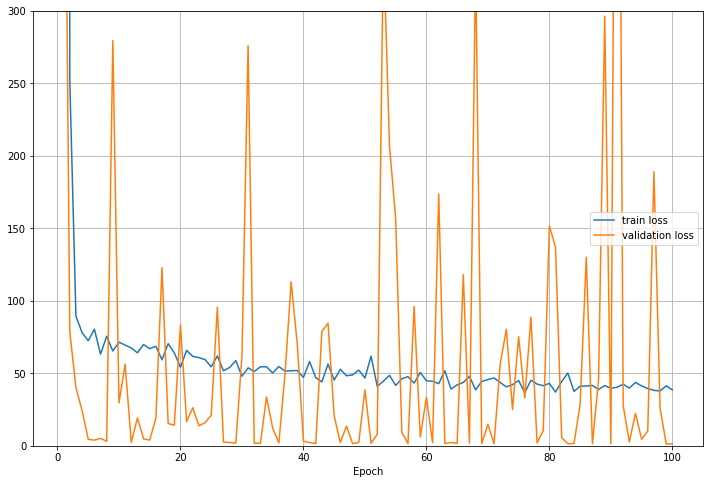

In [12]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.ylim(0,300)
plt.xlabel('Epoch')
plt.show()

- 평가

In [13]:
pred = model.predict(X_test)

In [15]:
dft = pd.DataFrame({'y_test': y_test, 'pred': pred.flatten()})
dft.head()

,y_test,pred
0,4.771,4.939739
1,1.371,2.508445
2,1.233,2.938078
3,0.938,1.560721
4,3.260,3.459108


In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, pred), r2_score(y_test, pred)

(1.3822859372691165, -0.0770326167856219)